In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras

2024-05-09 10:41:02.178074: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 10:41:02.178198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 10:41:02.321212: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load the datasets

In [2]:
from tensorflow.keras.datasets.mnist import load_data

(X_train,y_train),(X_test,y_test)=load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
print("Test Size : ",len(X_test))

print("Train Size : ",len(X_train))

Test Size :  10000
Train Size :  60000


**Let's test some images**

In [5]:
X_train[23]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 121, 254, 136,   0,   0,   0,   0,   0,
          0,   0],
       [  

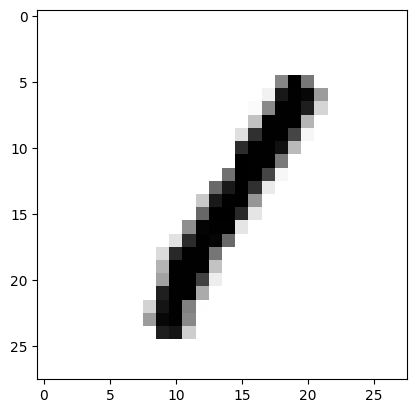

In [6]:
plt.imshow(X_train[23],cmap=plt.cm.binary)
plt.show()

In [7]:
y_train[23]

1

checking..... 0
checking..... 0
Image Index.. 0
checking..... 1
Image Index.. 1
checking..... 2
Image Index.. 2
checking..... 3
Image Index.. 3
checking..... 4
Image Index.. 4
checking..... 5
Image Index.. 5
checking..... 1
checking..... 0
Image Index.. 5
checking..... 1
Image Index.. 6
checking..... 2
Image Index.. 7
checking..... 3
Image Index.. 8
checking..... 4
Image Index.. 9
checking..... 5
Image Index.. 10
checking..... 2
checking..... 0
Image Index.. 10
checking..... 1
Image Index.. 11
checking..... 2
Image Index.. 12
checking..... 3
Image Index.. 13
checking..... 4
Image Index.. 14
checking..... 5
Image Index.. 15


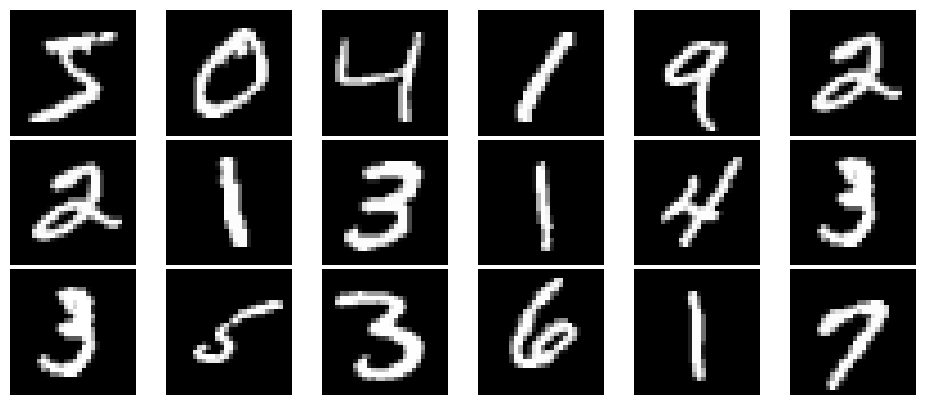

In [8]:
n_rows,n_cols = 3,6

f,ax =plt.subplots(3,6,figsize=(12,5),gridspec_kw={'wspace':0.04,'hspace':0.03},squeeze=True)

for r in range(n_rows):
    print('checking.....',r)
    
    for c in range(n_cols):
        print('checking.....',c)
        
        image_index = r*5+ c 
        print('Image Index..',image_index)
        ax[r,c].axis('off')
        ax[r,c].imshow(X_train[image_index],cmap='gray')
plt.show()
plt.close()

**Let's look some matrix values**

In [9]:
X_train[12].min()

0

In [10]:
X_train[12].max()

255

## Scaling the matrix value

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255

X_test/=255

In [12]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test =X_test.reshape(X_test.shape[0],28,28,1)

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# One Hot Encoding

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [16]:
y_train.shape

(60000, 10)

# Building Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten , Dense ,BatchNormalization , Dropout, Input

In [18]:
# Define input shape

input_shape = X_train[23].shape
input_shape

(28, 28, 1)

In [19]:
model =Sequential()

#model.add(Input(shape=input_shape)) #It helps model to compile better when u add the input as a "LAYER"

######## CNN ##########

model.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())


#### ANN #########

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# output layer 

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Model Summary

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 9, 9, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9, 9, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,786 (171.04 KB)

 Trainable params: 43,434 (169.66 KB)

 Non-trainable params: 352 (1.38 KB)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          mode='auto',
                           restore_best_weights=True,
                           verbose=1,
                           patience=50
                          
                          )

In [23]:
model.fit(X_train,y_train,validation_split=0.1,batch_size=512,epochs=100,verbose=1,callbacks=[early_stop])

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.6986 - loss: 0.9607 - val_accuracy: 0.1050 - val_loss: 2.6713
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9529 - loss: 0.1563 - val_accuracy: 0.2835 - val_loss: 2.4696
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9666 - loss: 0.1090 - val_accuracy: 0.5832 - val_loss: 1.2577
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9734 - loss: 0.0837 - val_accuracy: 0.9182 - val_loss: 0.2841
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9788 - loss: 0.0685 - val_accuracy: 0.9723 - val_loss: 0.0931
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9794 - loss: 0.0664 - val_accuracy: 0.9860 - val_loss: 0.0445
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9824 - loss: 0.0574 - val_accuracy: 0.9882 - val_loss: 0.0379
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9837 - loss: 0.0504

In [24]:
model.history.history

{'accuracy': [0.8474814891815186,
  0.9557222127914429,
  0.9682592749595642,
  0.9739999771118164,
  0.9780370593070984,
  0.9797037243843079,
  0.9821666479110718,
  0.983222246170044,
  0.9849073886871338,
  0.9856111407279968,
  0.9867777824401855,
  0.9871296286582947,
  0.9881481528282166,
  0.988277792930603,
  0.9886666536331177,
  0.9894258975982666,
  0.9903518557548523,
  0.9907962679862976,
  0.9906851649284363,
  0.9910740852355957,
  0.9920740723609924,
  0.9915555715560913,
  0.9920185208320618,
  0.9926851987838745,
  0.9924629926681519,
  0.992555558681488,
  0.9935926198959351,
  0.9926111102104187,
  0.9929259419441223,
  0.9938703775405884,
  0.9936110973358154,
  0.9944815039634705,
  0.9939814805984497,
  0.9947037100791931,
  0.9940184950828552,
  0.99485182762146,
  0.9948333501815796,
  0.994185209274292,
  0.9947962760925293,
  0.9949629902839661,
  0.9954259395599365,
  0.9950000047683716,
  0.9950370192527771,
  0.9950370192527771,
  0.995722234249115,
  0.9

In [25]:
summary=pd.DataFrame(model.history.history)
summary.head(20)[4:20:2]

,accuracy,loss,val_accuracy,val_loss
4,0.978037,0.069874,0.972333,0.093067
6,0.982167,0.056623,0.988167,0.037941
8,0.984907,0.048005,0.990667,0.032603
10,0.986778,0.041894,0.991333,0.031590
12,0.988148,0.037687,0.991667,0.030129
14,0.988667,0.033575,0.991500,0.029330
16,0.990352,0.029893,0.991167,0.029004
18,0.990685,0.028544,0.991167,0.032924


In [26]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9906 - loss: 0.0261


[0.018871402367949486, 0.9930999875068665]

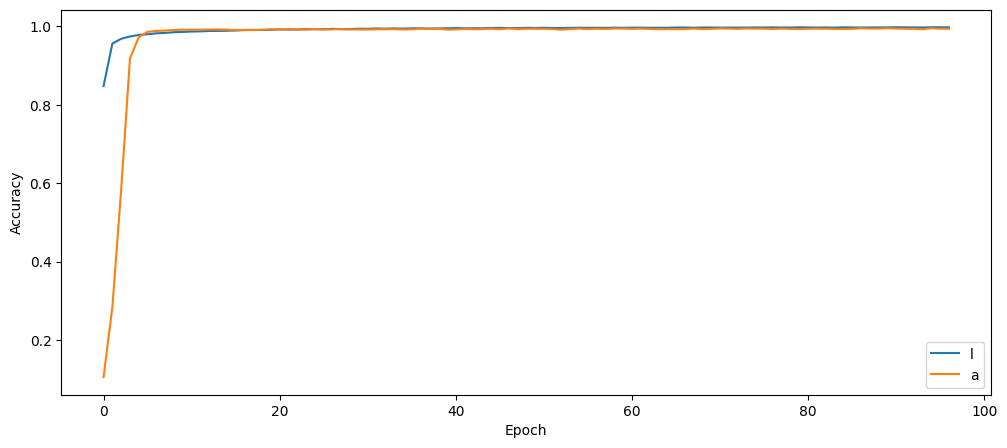

In [27]:
plt.figure(figsize=(12,5))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend('labels')

(0.95, 1.0)

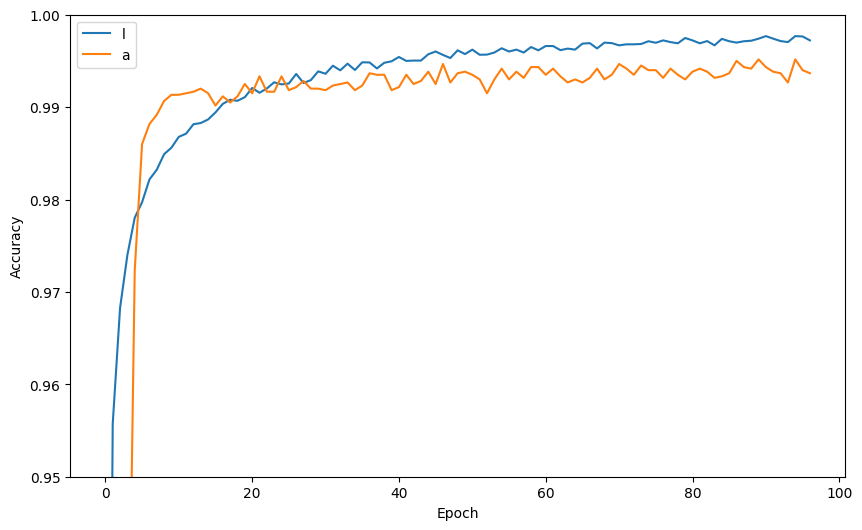

In [28]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

plt.ylim(0.95,1) #                                                                    

In [29]:
pred = model.predict(X_test)
pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.91349540e-11, 1.24350654e-08, 3.15414961e-09, ...,
        9.99999940e-01, 2.91125977e-12, 1.84013356e-08],
       [2.52282639e-09, 3.80444405e-08, 9.99999940e-01, ...,
        4.69126626e-10, 1.06731693e-10, 9.64783184e-11],
       [1.81277560e-09, 9.99999821e-01, 9.26885374e-11, ...,
        7.78980649e-08, 3.00232977e-10, 5.11640452e-11],
       ...,
       [3.80454631e-15, 4.06587319e-10, 1.16206695e-14, ...,
        1.13082162e-10, 6.20987844e-11, 2.40135001e-09],
       [9.90831722e-12, 1.68257525e-13, 6.60824368e-13, ...,
        1.02013309e-12, 8.62175682e-08, 4.66661172e-12],
       [3.10319660e-06, 2.36743585e-08, 1.73879507e-05, ...,
        1.98899963e-09, 3.98247448e-06, 1.83682509e-08]], dtype=float32)

In [30]:
pred[0]

array([1.9134954e-11, 1.2435065e-08, 3.1541496e-09, 1.3863132e-09,
       1.4231164e-09, 9.8639681e-12, 1.9738727e-13, 9.9999994e-01,
       2.9112598e-12, 1.8401336e-08], dtype=float32)

In [31]:
predictions = np.argmax(pred,axis=1)

In [32]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [33]:
print(predictions[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
